<a href="https://colab.research.google.com/github/oerv13-gh/Ibero/blob/main/Preparacion_Datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Preparacion de los Datos

1. Cargar librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')


**Importancia de los datos en modelos de aprendizaje automatico (Ciclo de Vida):**


**Recoleccion.** Obtener los datos de diversas fuentes.
**Limpieza.** Corregir inconsistencias y errores.
**Exploracion.** Enterder patrones y realciones.
**Preprocesamiento.** Preparan los datos para el entrenamiento con algoritmos
**Modelado.** Entrenamiento con algoritmos
**Evaluacion.** Medir desempeño
**Despliegue.** Poner a trabajar el modelo en produccion.

Importante: Sis sus datos estan mal, la salida del modelo estara mal.
Datos de calidad pobre = Modelos de calidad pobre
Elemento de la lista

80% del tiempo en aprendizaje automatico se dedica a preparar los datos
20% de tiempo se dedica a modelado y evaluacion

**2. Cargar dataset**


In [2]:
# Cargar dataset
from sklearn.datasets import fetch_openml
boston = fetch_openml(name='boston', version=1, as_frame=True)
df = boston.frame.copy()

print(f"\n DATASET BOSTON HOUSING")
print(f"   • Muestras: {df.shape[0]}")
print(f"   • Características: {df.shape[1]}")
print(f"   • Variable objetivo: MEDV (Precio de vivienda en $1000s)")

# Mostrar estructura inicial
print("\n ESTRUCTURA INICIAL DEL DATASET:")
print("   Tipos de datos por columna:")
for col in df.columns:
    print(f"   • {col}: {df[col].dtype}")



 DATASET BOSTON HOUSING
   • Muestras: 506
   • Características: 14
   • Variable objetivo: MEDV (Precio de vivienda en $1000s)

 ESTRUCTURA INICIAL DEL DATASET:
   Tipos de datos por columna:
   • CRIM: float64
   • ZN: float64
   • INDUS: float64
   • CHAS: category
   • NOX: float64
   • RM: float64
   • AGE: float64
   • DIS: float64
   • RAD: category
   • TAX: float64
   • PTRATIO: float64
   • B: float64
   • LSTAT: float64
   • MEDV: float64


**3. Analisis de Calidad de Datos**


ANÁLISIS DE CALIDAD DE DATOS - DETECCIÓN DE PROBLEMAS

 1. ANÁLISIS DE VALORES FALTANTES:
Total de valores faltantes por columna:
--------------------------------------------------
 No hay valores faltantes en el dataset


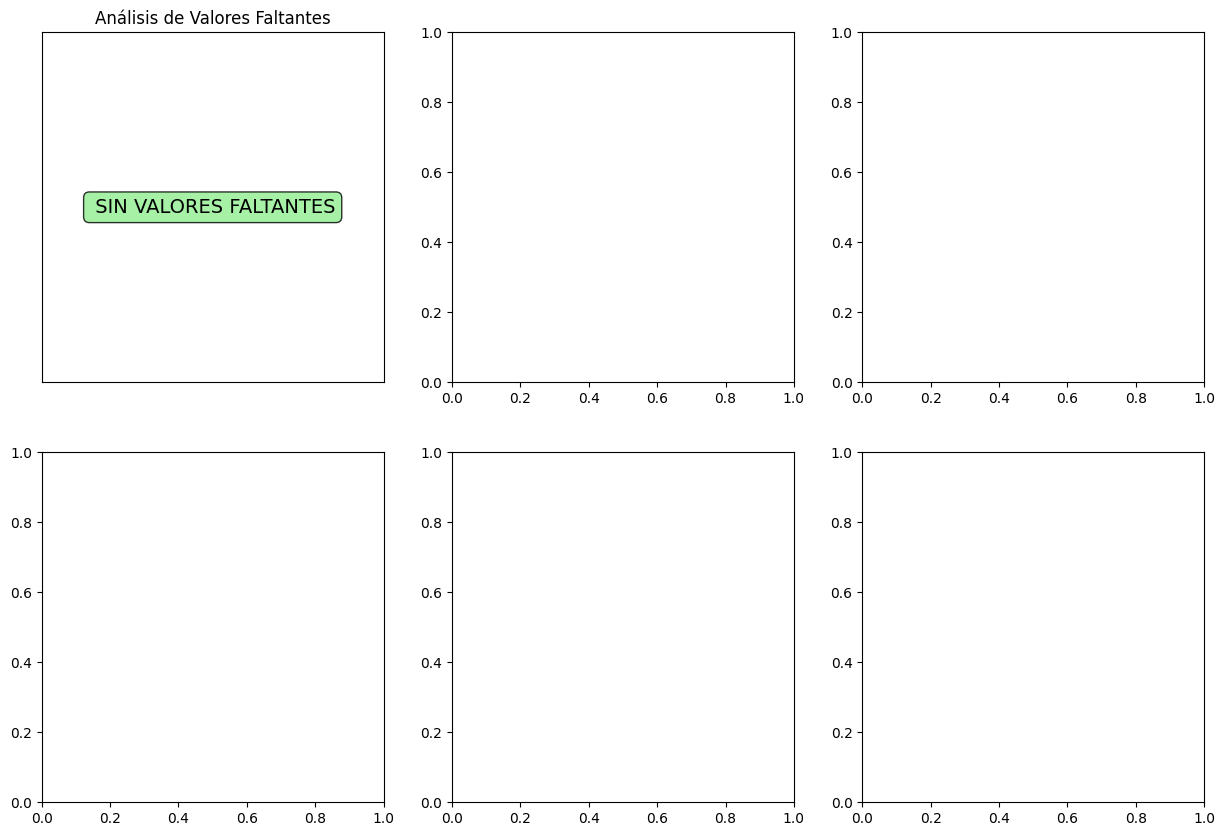

In [3]:
print("\n" + "=" * 70)
print("ANÁLISIS DE CALIDAD DE DATOS - DETECCIÓN DE PROBLEMAS")
print("=" * 70)

# Crear un panel de diagnóstico
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# 1. Valores faltantes
print("\n 1. ANÁLISIS DE VALORES FALTANTES:")
missing_data = df.isnull().sum()
missing_percentage = (missing_data / len(df)) * 100

missing_df = pd.DataFrame({
    'Valores Faltantes': missing_data,
    'Porcentaje (%)': missing_percentage
}).sort_values('Porcentaje (%)', ascending=False)

print("Total de valores faltantes por columna:")
print("-" * 50)
if missing_df['Valores Faltantes'].sum() == 0:
    print(" No hay valores faltantes en el dataset")
else:
    print(missing_df[missing_df['Valores Faltantes'] > 0])

# Gráfico de valores faltantes
if missing_df['Valores Faltantes'].sum() > 0:
    axes[0, 0].barh(missing_df.index, missing_df['Porcentaje (%)'])
    axes[0, 0].set_title('Porcentaje de Valores Faltantes por Columna')
    axes[0, 0].set_xlabel('Porcentaje (%)')
else:
    axes[0, 0].text(0.5, 0.5, ' SIN VALORES FALTANTES',
                   ha='center', va='center', fontsize=14,
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    axes[0, 0].set_title('Análisis de Valores Faltantes')
    axes[0, 0].set_xticks([])
    axes[0, 0].set_yticks([])


In [4]:
# 2. Duplicados
print("\n 2. ANÁLISIS DE DATOS DUPLICADOS:")
duplicates = df.duplicated().sum()
print(f"   • Registros duplicados: {duplicates}")
print(f"   • Porcentaje: {duplicates/len(df)*100:.2f}%")

if duplicates > 0:
    axes[0, 1].pie([len(df)-duplicates, duplicates],
                   labels=['Únicos', 'Duplicados'],
                   autopct='%1.1f%%', colors=['lightgreen', 'salmon'])
else:
    axes[0, 1].text(0.5, 0.5, ' SIN DUPLICADOS',
                   ha='center', va='center', fontsize=14,
                   bbox=dict(boxstyle='round', facecolor='lightgreen', alpha=0.8))
    axes[0, 1].set_xticks([])
    axes[0, 1].set_yticks([])
axes[0, 1].set_title('Proporción de Datos Duplicados')


 2. ANÁLISIS DE DATOS DUPLICADOS:
   • Registros duplicados: 0
   • Porcentaje: 0.00%


Text(0.5, 1.0, 'Proporción de Datos Duplicados')

In [5]:
# 3. Tipos de datos
print("\n 3. ANÁLISIS DE TIPOS DE DATOS:")
print("   Columnas y sus tipos:")
print("-" * 50)
for col in df.columns:
    unique_count = df[col].nunique()
    print(f"   • {col}: {df[col].dtype} | Valores únicos: {unique_count}")


 3. ANÁLISIS DE TIPOS DE DATOS:
   Columnas y sus tipos:
--------------------------------------------------
   • CRIM: float64 | Valores únicos: 504
   • ZN: float64 | Valores únicos: 26
   • INDUS: float64 | Valores únicos: 76
   • CHAS: category | Valores únicos: 2
   • NOX: float64 | Valores únicos: 81
   • RM: float64 | Valores únicos: 446
   • AGE: float64 | Valores únicos: 356
   • DIS: float64 | Valores únicos: 412
   • RAD: category | Valores únicos: 9
   • TAX: float64 | Valores únicos: 66
   • PTRATIO: float64 | Valores únicos: 46
   • B: float64 | Valores únicos: 357
   • LSTAT: float64 | Valores únicos: 455
   • MEDV: float64 | Valores únicos: 229


In [6]:
# 4. Estadísticas descriptivas básicas
print("\n 4. ESTADÍSTICAS DESCRIPTIVAS:")
print("-" * 50)
print(df.describe().round(2))


 4. ESTADÍSTICAS DESCRIPTIVAS:
--------------------------------------------------
         CRIM      ZN   INDUS     NOX      RM     AGE     DIS     TAX  \
count  506.00  506.00  506.00  506.00  506.00  506.00  506.00  506.00   
mean     3.61   11.36   11.14    0.55    6.28   68.57    3.80  408.24   
std      8.60   23.32    6.86    0.12    0.70   28.15    2.11  168.54   
min      0.01    0.00    0.46    0.38    3.56    2.90    1.13  187.00   
25%      0.08    0.00    5.19    0.45    5.89   45.02    2.10  279.00   
50%      0.26    0.00    9.69    0.54    6.21   77.50    3.21  330.00   
75%      3.68   12.50   18.10    0.62    6.62   94.07    5.19  666.00   
max     88.98  100.00   27.74    0.87    8.78  100.00   12.13  711.00   

       PTRATIO       B   LSTAT    MEDV  
count   506.00  506.00  506.00  506.00  
mean     18.46  356.67   12.65   22.53  
std       2.16   91.29    7.14    9.20  
min      12.60    0.32    1.73    5.00  
25%      17.40  375.38    6.95   17.02  
50%      19.0


5. VISUALIZACIÓN DE DISTRIBUCIONES:
Columnas numéricas encontradas: 12


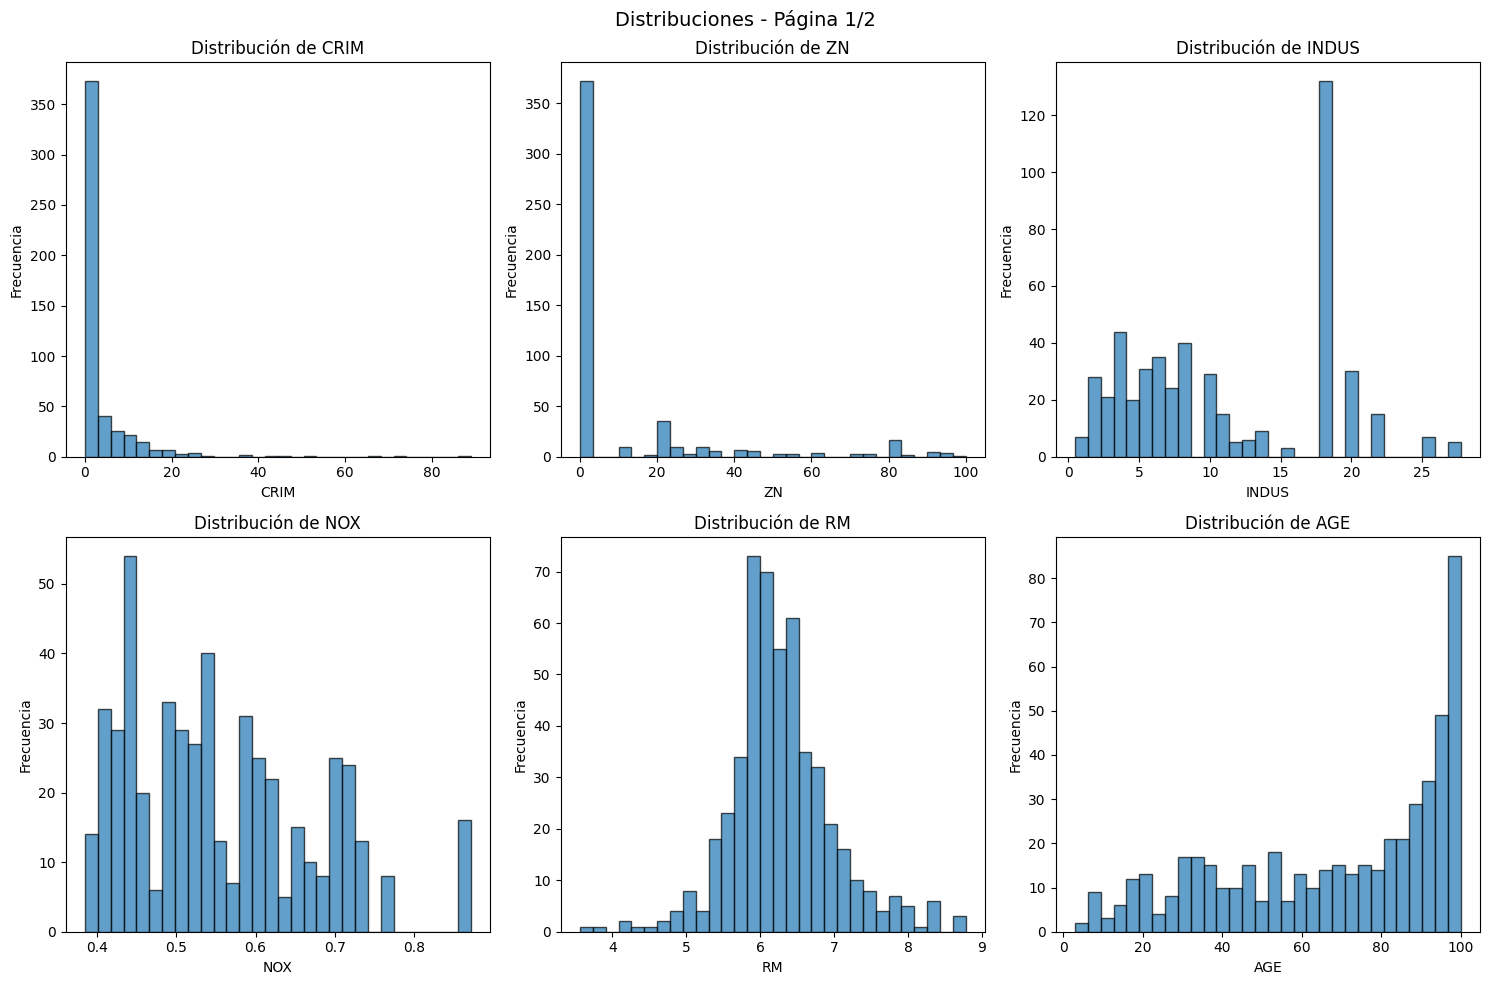

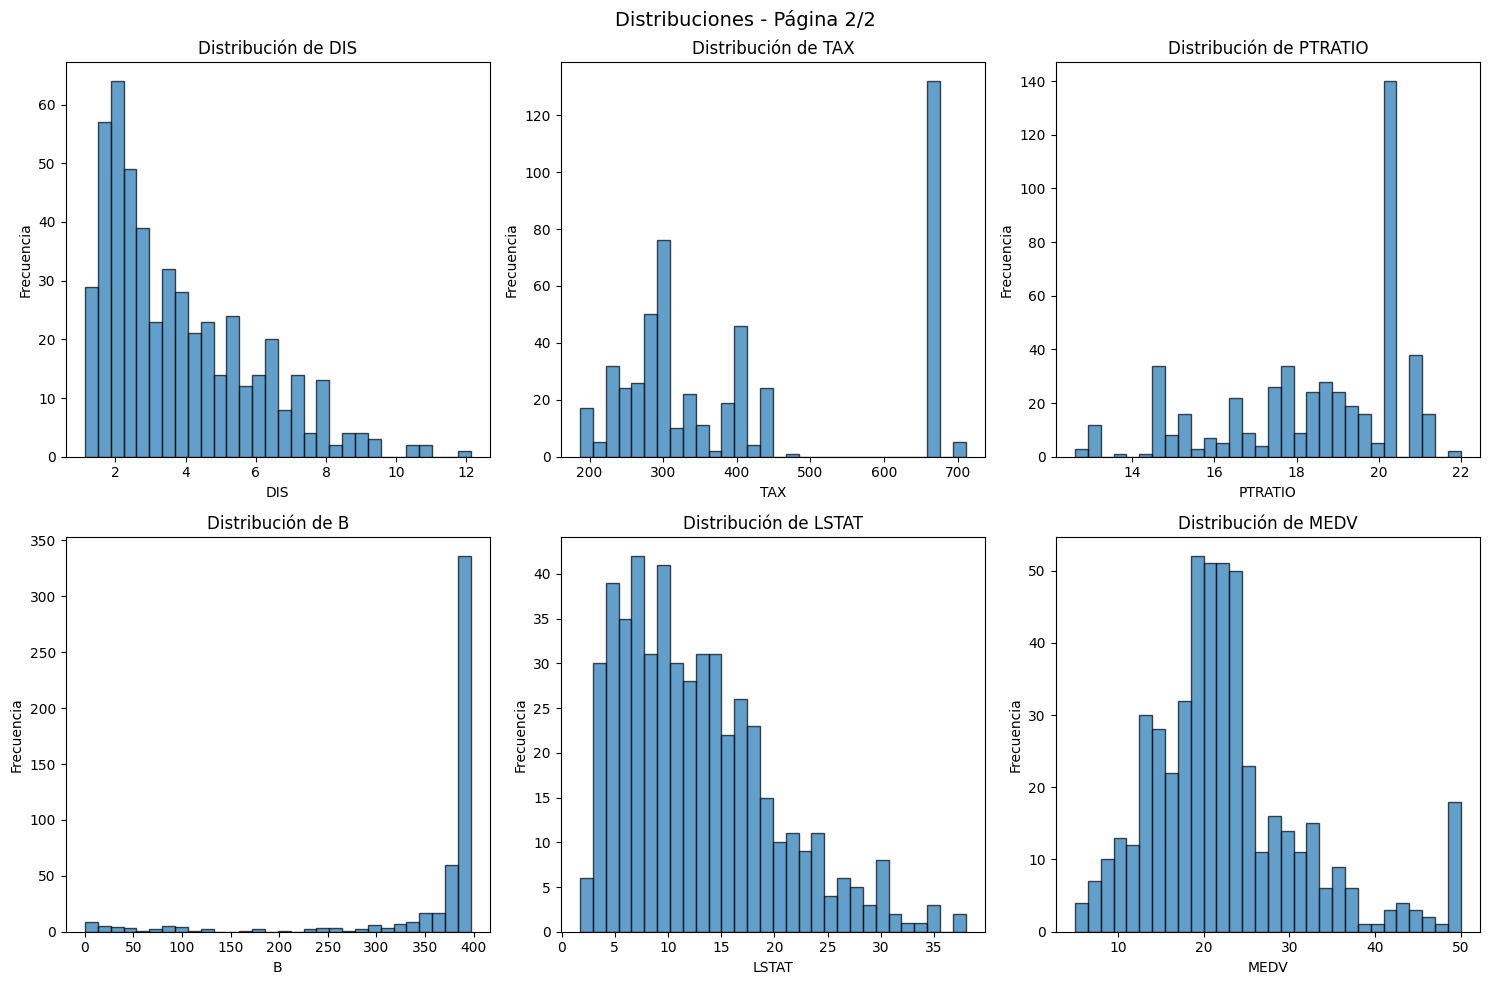

In [9]:
# 5 Visualización de distribuciones
print("\n5. VISUALIZACIÓN DE DISTRIBUCIONES:")
numeric_cols = df.select_dtypes(include=[np.number]).columns
print(f"Columnas numéricas encontradas: {len(numeric_cols)}")

# Tomar TODAS las columnas numéricas
sample_cols = list(numeric_cols)

# Calcular número total de gráficos y páginas necesarias
n_cols_per_page = 6  # 2 filas × 3 columnas
n_pages = (len(sample_cols) + n_cols_per_page - 1) // n_cols_per_page

for page in range(n_pages):
    # Crear nueva figura para cada página
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.flatten()  # Convertir a array 1D para fácil acceso

    # Calcular índices para esta página
    start_idx = page * n_cols_per_page
    end_idx = min((page + 1) * n_cols_per_page, len(sample_cols))
    page_cols = sample_cols[start_idx:end_idx]

    # Graficar columnas de esta página
    for i, col in enumerate(page_cols):
        axes[i].hist(df[col].dropna(), bins=30, edgecolor='black', alpha=0.7)
        axes[i].set_title(f'Distribución de {col}')
        axes[i].set_xlabel(col)
        axes[i].set_ylabel('Frecuencia')

    # Ocultar ejes sobrantes en esta página
    for i in range(len(page_cols), len(axes)):
        axes[i].axis('off')

    plt.suptitle(f'Distribuciones - Página {page + 1}/{n_pages}', fontsize=14)
    plt.tight_layout()
    plt.show()


Fase 2. Manejo datos faltantes


 CREANDO DATOS FALTANTES ARTIFICIALES PARA DEMOSTRACIÓN...

 COMPARACIÓN ANTES/DESPUÉS DE INTRODUCIR VALORES FALTANTES:
------------------------------------------------------------
  Columna  Original  Con Faltantes  % Faltantes
0    CRIM         0             31     6.126482
1      ZN         0             23     4.545455
2   INDUS         0             32     6.324111


NameError: name 'msno' is not defined

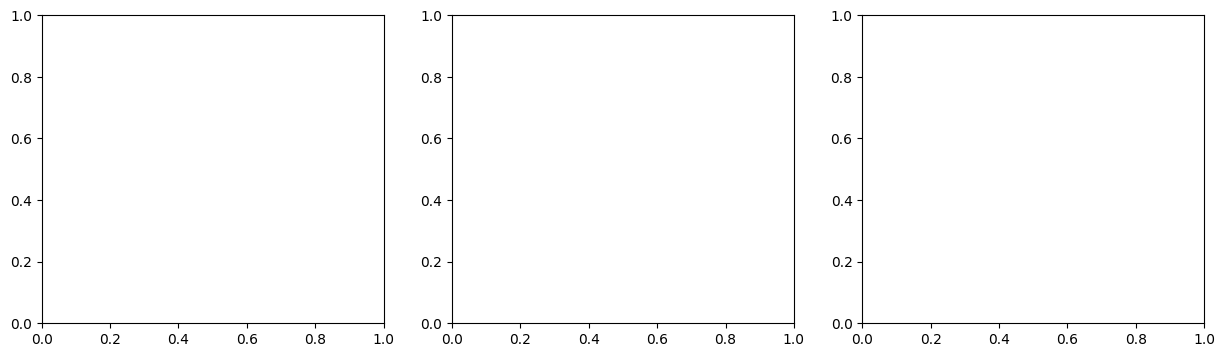

In [10]:
# Crear dataset con valores faltantes artificiales para demostración
print("\n CREANDO DATOS FALTANTES ARTIFICIALES PARA DEMOSTRACIÓN...")
df_with_missing = df.copy()

# Introducir valores faltantes aleatorios (5% en cada columna numérica)
np.random.seed(42)
for col in numeric_cols[:3]:  # Solo en primeras 3 columnas para demostración
    mask = np.random.random(len(df)) < 0.05
    df_with_missing.loc[mask, col] = np.nan

print("\n COMPARACIÓN ANTES/DESPUÉS DE INTRODUCIR VALORES FALTANTES:")
print("-" * 60)
comparison = pd.DataFrame({
    'Columna': numeric_cols[:3],
    'Original': [df[col].isnull().sum() for col in numeric_cols[:3]],
    'Con Faltantes': [df_with_missing[col].isnull().sum() for col in numeric_cols[:3]],
    '% Faltantes': [df_with_missing[col].isnull().sum()/len(df)*100 for col in numeric_cols[:3]]
})
print(comparison)

# Visualizar valores faltantes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Seleccionar solo las columnas con valores faltantes
cols_with_missing = [col for col in numeric_cols[:3] if df_with_missing[col].isnull().sum() > 0]

if len(cols_with_missing) > 0:
    # 1. Matriz de valores faltantes
    msno.matrix(df_with_missing[cols_with_missing], ax=axes[0])
    axes[0].set_title('Matriz de Valores Faltantes')

    # 2. Heatmap de correlación de faltantes
    msno.heatmap(df_with_missing[cols_with_missing], ax=axes[1])
    axes[1].set_title('Correlación entre Valores Faltantes')

    # 3. Bar plot de valores faltantes
    msno.bar(df_with_missing[cols_with_missing], ax=axes[2])
    axes[2].set_title('Conteo de Valores por Columna')
else:
    for i in range(3):
        axes[i].text(0.5, 0.5, 'No hay suficientes\nvalores faltantes\npara visualizar',
                    ha='center', va='center', fontsize=12)
        axes[i].set_title(['Matriz', 'Heatmap', 'Bar Plot'][i])

plt.tight_layout()
plt.show()

# DEMOSTRACIÓN DE DIFERENTES MÉTODOS DE IMPUTACIÓN
print("\n" + "-" * 60)
print("DEMOSTRACIÓN: MÉTODOS DE IMPUTACIÓN")
print("-" * 60)

from sklearn.impute import SimpleImputer

# Seleccionar una columna que tenga valores faltantes
if len(cols_with_missing) > 0:
    demo_col = cols_with_missing[0]
else:
    # Si no hay, usar la primera columna numérica
    demo_col = numeric_cols[0]
    # Introducir un valor faltante para demostración
    df_with_missing.loc[0, demo_col] = np.nan

methods = {
    'Media': SimpleImputer(strategy='mean'),
    'Mediana': SimpleImputer(strategy='median'),
    'Valor Constante (0)': SimpleImputer(strategy='constant', fill_value=0),
    'Más Frecuente': SimpleImputer(strategy='most_frequent')
}

# Aplicar cada método a una columna con valores faltantes
original_values = df[demo_col].copy()
missing_mask = df_with_missing[demo_col].isnull()

print(f"\n Columna demostración: {demo_col}")
print(f"   • Valores faltantes: {missing_mask.sum()}")
print(f"   • Media original: {original_values.mean():.2f}")
print(f"   • Mediana original: {original_values.median():.2f}")
print(f"   • Rango: [{original_values.min():.2f}, {original_values.max():.2f}]")

results = {}
for method_name, imputer in methods.items():
    imputed_values = df_with_missing[[demo_col]].copy()
    imputed_values.iloc[:, 0] = imputer.fit_transform(imputed_values)[:, 0]

    # Calcular diferencia con valores originales (solo donde había faltantes)
    if missing_mask.sum() > 0:
        diff = np.abs(original_values[missing_mask] - imputed_values.loc[missing_mask, demo_col])
        avg_diff = diff.mean() if len(diff) > 0 else 0
        max_diff = diff.max() if len(diff) > 0 else 0
    else:
        avg_diff = 0
        max_diff = 0

    results[method_name] = {
        'Imputado': imputed_values.loc[missing_mask, demo_col].values[:3] if missing_mask.sum() > 0 else [],
        'Diferencia Promedio': avg_diff,
        'Diferencia Máxima': max_diff
    }

    print(f"\n   Método: {method_name}")
    if missing_mask.sum() > 0:
        imputed_vals = imputed_values.loc[missing_mask, demo_col].values[:3]
        print(f"      • Valores imputados (ejemplos): {imputed_vals}")
    print(f"      • Diferencia promedio: {avg_diff:.2f}")
    print(f"      • Diferencia máxima: {max_diff:.2f}")

# Visualización de métodos de imputación
if missing_mask.sum() > 0:
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    for idx, (method_name, result) in enumerate(results.items()):
        # Obtener valores imputados para este método
        temp_df = df_with_missing[[demo_col]].copy()
        temp_imputer = methods[method_name]
        temp_imputed = temp_imputer.fit_transform(temp_df)

        axes[idx].hist(temp_imputed, bins=30, alpha=0.7, edgecolor='black',
                      label=f'Imputado ({method_name})')
        axes[idx].axvline(x=original_values.mean(), color='red', linestyle='--',
                         linewidth=1, label='Media original')
        axes[idx].set_title(f'{method_name}\nDiff avg: {result["Diferencia Promedio"]:.2f}')
        axes[idx].set_xlabel(demo_col)
        axes[idx].legend(fontsize=8)

    plt.suptitle(f'Comparación de Métodos de Imputación para {demo_col}', fontsize=14)
    plt.tight_layout()
    plt.show()


In [11]:
# Eliminar datos nulos o nan

print("\n" + "=" * 70)
print("ELIMINACIÓN DE FILAS CON VALORES FALTANTES")
print("=" * 70)

print("""
📋 ELIMINACIÓN DE FILAS (DROPNA):

VENTAJAS:
• Simple y rápido de implementar
• No introduce sesgo por imputación
• Mantiene la integridad de los datos originales

DESVENTAJAS:
• Pérdida de información valiosa
• Puede reducir significativamente el tamaño del dataset
• Puede introducir sesgo si los datos faltantes no son aleatorios

📊 REGLA GENERAL:
• Si < 5% de valores faltantes → Considerar eliminación
• Si 5-20% de valores faltantes → Evaluar impacto
• Si > 20% de valores faltantes → NO eliminar
""")

# Método 1: Eliminación simple
print("\n" + "-" * 60)
print("1. ELIMINACIÓN SIMPLE (DROPNA)")
print("-" * 60)

# Crear copia del dataset con valores faltantes
df_missing_copy = df_with_missing.copy()

print("📊 ESTADO INICIAL DEL DATASET:")
print(f"   • Filas totales: {len(df_missing_copy)}")
print(f"   • Columnas totales: {len(df_missing_copy.columns)}")
print(f"   • Valores faltantes totales: {df_missing_copy.isnull().sum().sum()}")
print(f"   • Porcentaje total de valores faltantes: {df_missing_copy.isnull().sum().sum()/(len(df_missing_copy)*len(df_missing_copy.columns))*100:.2f}%")

# Mostrar valores faltantes por columna
print("\n🔍 VALORES FALTANTES POR COLUMNA:")
missing_by_col = df_missing_copy.isnull().sum()
missing_by_col_percent = (missing_by_col / len(df_missing_copy)) * 100
missing_df_detailed = pd.DataFrame({
    'Valores Faltantes': missing_by_col,
    'Porcentaje (%)': missing_by_col_percent
}).sort_values('Porcentaje (%)', ascending=False)

print(missing_df_detailed[missing_df_detailed['Valores Faltantes'] > 0])

# Método 1a: Eliminar filas con CUALQUIER valor faltante
print("\n🔧 MÉTODO 1a: ELIMINAR FILAS CON CUALQUIER VALOR FALTANTE")
df_dropped_any = df_missing_copy.dropna()
print(f"   • Filas eliminadas: {len(df_missing_copy) - len(df_dropped_any)}")
print(f"   • Filas restantes: {len(df_dropped_any)}")
print(f"   • Porcentaje de datos perdidos: {(1 - len(df_dropped_any)/len(df_missing_copy))*100:.2f}%")
print(f"   • Valores faltantes restantes: {df_dropped_any.isnull().sum().sum()}")

# Método 1b: Eliminar filas donde TODOS los valores son faltantes
print("\n🔧 MÉTODO 1b: ELIMINAR FILAS DONDE TODOS LOS VALORES SON FALTANTES")
# Primero, verificar si hay filas completamente vacías
rows_all_missing = df_missing_copy.isnull().all(axis=1).sum()
print(f"   • Filas completamente vacías: {rows_all_missing}")
if rows_all_missing > 0:
    df_dropped_all = df_missing_copy.dropna(how='all')
    print(f"   • Filas eliminadas: {rows_all_missing}")
else:
    df_dropped_all = df_missing_copy.copy()
    print(f"   • No hay filas completamente vacías")

# Método 1c: Eliminar filas con valores faltantes en columnas específicas
print("\n🔧 MÉTODO 1c: ELIMINAR FILAS CON VALORES FALTANTES EN COLUMNAS ESPECÍFICAS")
print("   (Columnas críticas para el análisis)")

# Seleccionar columnas críticas (las primeras 2 con valores faltantes)
critical_cols = cols_with_missing[:2] if len(cols_with_missing) >= 2 else cols_with_missing
if len(critical_cols) > 0:
    print(f"   • Columnas críticas seleccionadas: {critical_cols}")
    df_dropped_specific = df_missing_copy.dropna(subset=critical_cols)
    print(f"   • Filas eliminadas: {len(df_missing_copy) - len(df_dropped_specific)}")
    print(f"   • Filas restantes: {len(df_dropped_specific)}")
    print(f"   • Porcentaje de datos perdidos: {(1 - len(df_dropped_specific)/len(df_missing_copy))*100:.2f}%")
else:
    print("   • No hay suficientes columnas con valores faltantes para este método")

# Método 1d: Eliminar filas con más de X% de valores faltantes
print("\n🔧 MÉTODO 1d: ELIMINAR FILAS CON MÁS DEL 50% DE VALORES FALTANTES")
threshold = 0.5  # 50% de valores faltantes por fila
rows_missing_threshold = (df_missing_copy.isnull().sum(axis=1) / len(df_missing_copy.columns)) > threshold
rows_to_drop = rows_missing_threshold.sum()
print(f"   • Filas con > {threshold*100}% de valores faltantes: {rows_to_drop}")
if rows_to_drop > 0:
    df_dropped_threshold = df_missing_copy[~rows_missing_threshold]
    print(f"   • Filas eliminadas: {rows_to_drop}")
    print(f"   • Filas restantes: {len(df_dropped_threshold)}")
else:
    df_dropped_threshold = df_missing_copy.copy()
    print(f"   • No hay filas con más del {threshold*100}% de valores faltantes")

# COMPARACIÓN VISUAL DE LOS MÉTODOS DE ELIMINACIÓN
print("\n" + "-" * 60)
print("COMPARACIÓN DE MÉTODOS DE ELIMINACIÓN")
print("-" * 60)

# Crear resumen de métodos
elimination_methods = {
    'Dataset Original': len(df_missing_copy),
    'Eliminar cualquier faltante': len(df_dropped_any) if 'df_dropped_any' in locals() else 0,
    'Eliminar completamente vacías': len(df_dropped_all) if 'df_dropped_all' in locals() else 0,
}

if 'df_dropped_specific' in locals():
    elimination_methods['Eliminar en columnas críticas'] = len(df_dropped_specific)

if 'df_dropped_threshold' in locals():
    elimination_methods[f'Eliminar >{threshold*100}% faltantes'] = len(df_dropped_threshold)

# Crear DataFrame de comparación
elimination_comparison = pd.DataFrame({
    'Método': list(elimination_methods.keys()),
    'Filas Restantes': list(elimination_methods.values())
})
elimination_comparison['Filas Eliminadas'] = len(df_missing_copy) - elimination_comparison['Filas Restantes']
elimination_comparison['% Datos Perdidos'] = (elimination_comparison['Filas Eliminadas'] / len(df_missing_copy)) * 100



ELIMINACIÓN DE FILAS CON VALORES FALTANTES

📋 ELIMINACIÓN DE FILAS (DROPNA):
 
VENTAJAS:
• Simple y rápido de implementar
• No introduce sesgo por imputación
• Mantiene la integridad de los datos originales
 
DESVENTAJAS:
• Pérdida de información valiosa
• Puede reducir significativamente el tamaño del dataset
• Puede introducir sesgo si los datos faltantes no son aleatorios
 
📊 REGLA GENERAL:
• Si < 5% de valores faltantes → Considerar eliminación
• Si 5-20% de valores faltantes → Evaluar impacto
• Si > 20% de valores faltantes → NO eliminar


------------------------------------------------------------
1. ELIMINACIÓN SIMPLE (DROPNA)
------------------------------------------------------------
📊 ESTADO INICIAL DEL DATASET:
   • Filas totales: 506
   • Columnas totales: 14
   • Valores faltantes totales: 86
   • Porcentaje total de valores faltantes: 1.21%

🔍 VALORES FALTANTES POR COLUMNA:
       Valores Faltantes  Porcentaje (%)
INDUS                 32        6.324111
CRIM          


 CREANDO DATOS FALTANTES ARTIFICIALES PARA DEMOSTRACIÓN...

 COMPARACIÓN ANTES/DESPUÉS DE INTRODUCIR VALORES FALTANTES:
------------------------------------------------------------
  Columna  Original  Con Faltantes  % Faltantes
0    CRIM         0             31     6.126482
1      ZN         0             23     4.545455
2   INDUS         0             32     6.324111


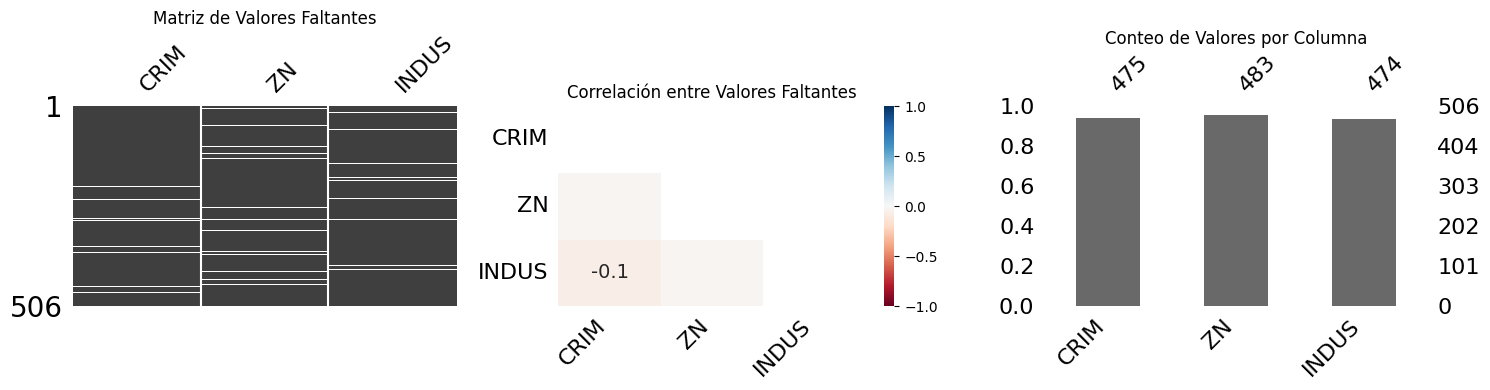


------------------------------------------------------------
DEMOSTRACIÓN: MÉTODOS DE IMPUTACIÓN
------------------------------------------------------------

 Columna demostración: CRIM
   • Valores faltantes: 31
   • Media original: 3.61
   • Mediana original: 0.26
   • Rango: [0.01, 88.98]

   Método: Media
      • Valores imputados (ejemplos): [3.70421771 3.70421771 3.70421771]
      • Diferencia promedio: 3.34
      • Diferencia máxima: 8.25

   Método: Mediana
      • Valores imputados (ejemplos): [0.25915 0.25915 0.25915]
      • Diferencia promedio: 2.13
      • Diferencia máxima: 11.69

   Método: Valor Constante (0)
      • Valores imputados (ejemplos): [0. 0. 0.]
      • Diferencia promedio: 2.22
      • Diferencia máxima: 11.95

   Método: Más Frecuente
      • Valores imputados (ejemplos): [0.01501 0.01501 0.01501]
      • Diferencia promedio: 2.21
      • Diferencia máxima: 11.94


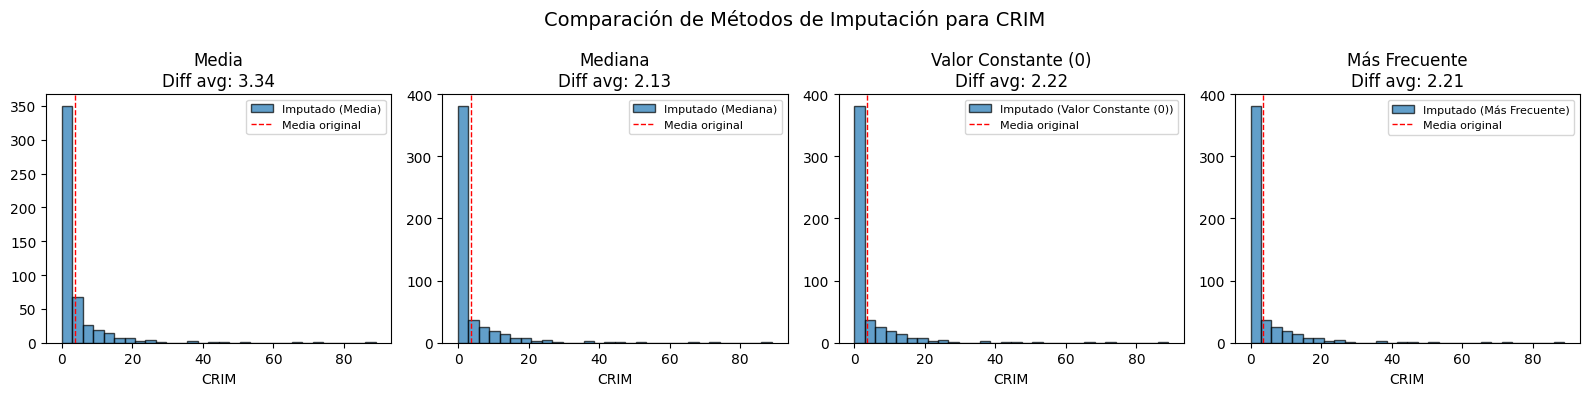


ELIMINACIÓN DE FILAS CON VALORES FALTANTES

📋 ELIMINACIÓN DE FILAS (DROPNA):

VENTAJAS:
• Simple y rápido de implementar
• No introduce sesgo por imputación
• Mantiene la integridad de los datos originales

DESVENTAJAS:
• Pérdida de información valiosa
• Puede reducir significativamente el tamaño del dataset
• Puede introducir sesgo si los datos faltantes no son aleatorios

📊 REGLA GENERAL:
• Si < 5% de valores faltantes → Considerar eliminación
• Si 5-20% de valores faltantes → Evaluar impacto
• Si > 20% de valores faltantes → NO eliminar


------------------------------------------------------------
1. ELIMINACIÓN SIMPLE (DROPNA)
------------------------------------------------------------
📊 ESTADO INICIAL DEL DATASET:
   • Filas totales: 506
   • Columnas totales: 14
   • Valores faltantes totales: 86
   • Porcentaje total de valores faltantes: 1.21%

🔍 VALORES FALTANTES POR COLUMNA:
       Valores Faltantes  Porcentaje (%)
INDUS                 32        6.324111
CRIM             

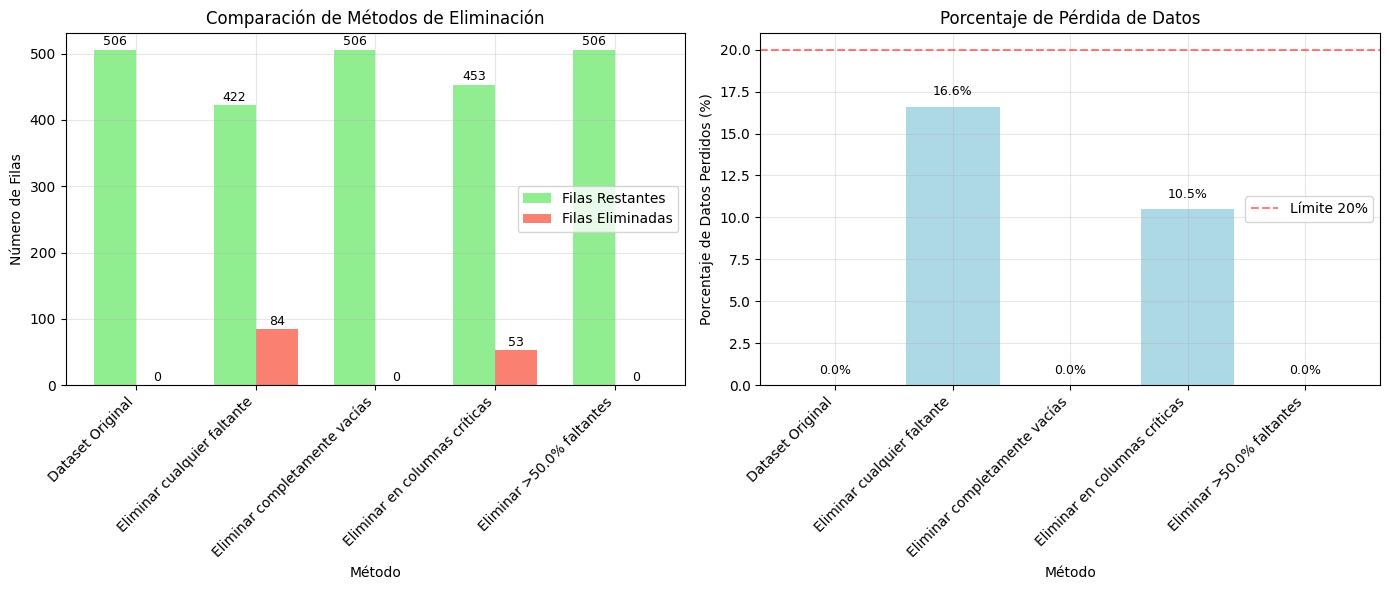

In [14]:
# Crear dataset con valores faltantes artificiales para demostración
import missingno as msno
print("\n CREANDO DATOS FALTANTES ARTIFICIALES PARA DEMOSTRACIÓN...")
df_with_missing = df.copy()

# Introducir valores faltantes aleatorios (5% en cada columna numérica)
np.random.seed(42)
for col in numeric_cols[:3]:  # Solo en primeras 3 columnas para demostración
    mask = np.random.random(len(df)) < 0.05
    df_with_missing.loc[mask, col] = np.nan

print("\n COMPARACIÓN ANTES/DESPUÉS DE INTRODUCIR VALORES FALTANTES:")
print("-" * 60)
comparison = pd.DataFrame({
    'Columna': numeric_cols[:3],
    'Original': [df[col].isnull().sum() for col in numeric_cols[:3]],
    'Con Faltantes': [df_with_missing[col].isnull().sum() for col in numeric_cols[:3]],
    '% Faltantes': [df_with_missing[col].isnull().sum()/len(df)*100 for col in numeric_cols[:3]]
})
print(comparison)

# Visualizar valores faltantes
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

# Seleccionar solo las columnas con valores faltantes
cols_with_missing = [col for col in numeric_cols[:3] if df_with_missing[col].isnull().sum() > 0]

if len(cols_with_missing) > 0:
    # 1. Matriz de valores faltantes
    msno.matrix(df_with_missing[cols_with_missing], ax=axes[0])
    axes[0].set_title('Matriz de Valores Faltantes')

    # 2. Heatmap de correlación de faltantes
    msno.heatmap(df_with_missing[cols_with_missing], ax=axes[1])
    axes[1].set_title('Correlación entre Valores Faltantes')

    # 3. Bar plot de valores faltantes
    msno.bar(df_with_missing[cols_with_missing], ax=axes[2])
    axes[2].set_title('Conteo de Valores por Columna')
else:
    for i in range(3):
        axes[i].text(0.5, 0.5, 'No hay suficientes\nvalores faltantes\npara visualizar',
                    ha='center', va='center', fontsize=12)
        axes[i].set_title(['Matriz', 'Heatmap', 'Bar Plot'][i])

plt.tight_layout()
plt.show()

# DEMOSTRACIÓN DE DIFERENTES MÉTODOS DE IMPUTACIÓN
print("\n" + "-" * 60)
print("DEMOSTRACIÓN: MÉTODOS DE IMPUTACIÓN")
print("-" * 60)

from sklearn.impute import SimpleImputer

# Seleccionar una columna que tenga valores faltantes
if len(cols_with_missing) > 0:
    demo_col = cols_with_missing[0]
else:
    # Si no hay, usar la primera columna numérica
    demo_col = numeric_cols[0]
    # Introducir un valor faltante para demostración
    df_with_missing.loc[0, demo_col] = np.nan

methods = {
    'Media': SimpleImputer(strategy='mean'),
    'Mediana': SimpleImputer(strategy='median'),
    'Valor Constante (0)': SimpleImputer(strategy='constant', fill_value=0),
    'Más Frecuente': SimpleImputer(strategy='most_frequent')
}

# Aplicar cada método a una columna con valores faltantes
original_values = df[demo_col].copy()
missing_mask = df_with_missing[demo_col].isnull()

print(f"\n Columna demostración: {demo_col}")
print(f"   • Valores faltantes: {missing_mask.sum()}")
print(f"   • Media original: {original_values.mean():.2f}")
print(f"   • Mediana original: {original_values.median():.2f}")
print(f"   • Rango: [{original_values.min():.2f}, {original_values.max():.2f}]")

results = {}
for method_name, imputer in methods.items():
    imputed_values = df_with_missing[[demo_col]].copy()
    imputed_values.iloc[:, 0] = imputer.fit_transform(imputed_values)[:, 0]

    # Calcular diferencia con valores originales (solo donde había faltantes)
    if missing_mask.sum() > 0:
        diff = np.abs(original_values[missing_mask] - imputed_values.loc[missing_mask, demo_col])
        avg_diff = diff.mean() if len(diff) > 0 else 0
        max_diff = diff.max() if len(diff) > 0 else 0
    else:
        avg_diff = 0
        max_diff = 0

    results[method_name] = {
        'Imputado': imputed_values.loc[missing_mask, demo_col].values[:3] if missing_mask.sum() > 0 else [],
        'Diferencia Promedio': avg_diff,
        'Diferencia Máxima': max_diff
    }

    print(f"\n   Método: {method_name}")
    if missing_mask.sum() > 0:
        imputed_vals = imputed_values.loc[missing_mask, demo_col].values[:3]
        print(f"      • Valores imputados (ejemplos): {imputed_vals}")
    print(f"      • Diferencia promedio: {avg_diff:.2f}")
    print(f"      • Diferencia máxima: {max_diff:.2f}")

# Visualización de métodos de imputación
if missing_mask.sum() > 0:
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))

    for idx, (method_name, result) in enumerate(results.items()):
        # Obtener valores imputados para este método
        temp_df = df_with_missing[[demo_col]].copy()
        temp_imputer = methods[method_name]
        temp_imputed = temp_imputer.fit_transform(temp_df)

        axes[idx].hist(temp_imputed, bins=30, alpha=0.7, edgecolor='black',
                      label=f'Imputado ({method_name})')
        axes[idx].axvline(x=original_values.mean(), color='red', linestyle='--',
                         linewidth=1, label='Media original')
        axes[idx].set_title(f'{method_name}\nDiff avg: {result["Diferencia Promedio"]:.2f}')
        axes[idx].set_xlabel(demo_col)
        axes[idx].legend(fontsize=8)

    plt.suptitle(f'Comparación de Métodos de Imputación para {demo_col}', fontsize=14)
    plt.tight_layout()
    plt.show()

# Eliminar datos nulos o nan

print("\n" + "=" * 70)
print("ELIMINACIÓN DE FILAS CON VALORES FALTANTES")
print("=" * 70)

print("""
📋 ELIMINACIÓN DE FILAS (DROPNA):

VENTAJAS:
• Simple y rápido de implementar
• No introduce sesgo por imputación
• Mantiene la integridad de los datos originales

DESVENTAJAS:
• Pérdida de información valiosa
• Puede reducir significativamente el tamaño del dataset
• Puede introducir sesgo si los datos faltantes no son aleatorios

📊 REGLA GENERAL:
• Si < 5% de valores faltantes → Considerar eliminación
• Si 5-20% de valores faltantes → Evaluar impacto
• Si > 20% de valores faltantes → NO eliminar
""")

# Método 1: Eliminación simple
print("\n" + "-" * 60)
print("1. ELIMINACIÓN SIMPLE (DROPNA)")
print("-" * 60)

# Crear copia del dataset con valores faltantes
df_missing_copy = df_with_missing.copy()

print("📊 ESTADO INICIAL DEL DATASET:")
print(f"   • Filas totales: {len(df_missing_copy)}")
print(f"   • Columnas totales: {len(df_missing_copy.columns)}")
print(f"   • Valores faltantes totales: {df_missing_copy.isnull().sum().sum()}")
print(f"   • Porcentaje total de valores faltantes: {df_missing_copy.isnull().sum().sum()/(len(df_missing_copy)*len(df_missing_copy.columns))*100:.2f}%")

# Mostrar valores faltantes por columna
print("\n🔍 VALORES FALTANTES POR COLUMNA:")
missing_by_col = df_missing_copy.isnull().sum()
missing_by_col_percent = (missing_by_col / len(df_missing_copy)) * 100
missing_df_detailed = pd.DataFrame({
    'Valores Faltantes': missing_by_col,
    'Porcentaje (%)': missing_by_col_percent
}).sort_values('Porcentaje (%)', ascending=False)

print(missing_df_detailed[missing_df_detailed['Valores Faltantes'] > 0])

# Método 1a: Eliminar filas con CUALQUIER valor faltante
print("\n🔧 MÉTODO 1a: ELIMINAR FILAS CON CUALQUIER VALOR FALTANTE")
df_dropped_any = df_missing_copy.dropna()
print(f"   • Filas eliminadas: {len(df_missing_copy) - len(df_dropped_any)}")
print(f"   • Filas restantes: {len(df_dropped_any)}")
print(f"   • Porcentaje de datos perdidos: {(1 - len(df_dropped_any)/len(df_missing_copy))*100:.2f}%")
print(f"   • Valores faltantes restantes: {df_dropped_any.isnull().sum().sum()}")

# Método 1b: Eliminar filas donde TODOS los valores son faltantes
print("\n🔧 MÉTODO 1b: ELIMINAR FILAS DONDE TODOS LOS VALORES SON FALTANTES")
# Primero, verificar si hay filas completamente vacías
rows_all_missing = df_missing_copy.isnull().all(axis=1).sum()
print(f"   • Filas completamente vacías: {rows_all_missing}")
if rows_all_missing > 0:
    df_dropped_all = df_missing_copy.dropna(how='all')
    print(f"   • Filas eliminadas: {rows_all_missing}")
else:
    df_dropped_all = df_missing_copy.copy()
    print(f"   • No hay filas completamente vacías")

# Método 1c: Eliminar filas con valores faltantes en columnas específicas
print("\n🔧 MÉTODO 1c: ELIMINAR FILAS CON VALORES FALTANTES EN COLUMNAS ESPECÍFICAS")
print("   (Columnas críticas para el análisis)")

# Seleccionar columnas críticas (las primeras 2 con valores faltantes)
critical_cols = cols_with_missing[:2] if len(cols_with_missing) >= 2 else cols_with_missing
if len(critical_cols) > 0:
    print(f"   • Columnas críticas seleccionadas: {critical_cols}")
    df_dropped_specific = df_missing_copy.dropna(subset=critical_cols)
    print(f"   • Filas eliminadas: {len(df_missing_copy) - len(df_dropped_specific)}")
    print(f"   • Filas restantes: {len(df_dropped_specific)}")
    print(f"   • Porcentaje de datos perdidos: {(1 - len(df_dropped_specific)/len(df_missing_copy))*100:.2f}%")
else:
    print("   • No hay suficientes columnas con valores faltantes para este método")

# Método 1d: Eliminar filas con más de X% de valores faltantes
print("\n🔧 MÉTODO 1d: ELIMINAR FILAS CON MÁS DEL 50% DE VALORES FALTANTES")
threshold = 0.5  # 50% de valores faltantes por fila
rows_missing_threshold = (df_missing_copy.isnull().sum(axis=1) / len(df_missing_copy.columns)) > threshold
rows_to_drop = rows_missing_threshold.sum()
print(f"   • Filas con > {threshold*100}% de valores faltantes: {rows_to_drop}")
if rows_to_drop > 0:
    df_dropped_threshold = df_missing_copy[~rows_missing_threshold]
    print(f"   • Filas eliminadas: {rows_to_drop}")
    print(f"   • Filas restantes: {len(df_dropped_threshold)}")
else:
    df_dropped_threshold = df_missing_copy.copy()
    print(f"   • No hay filas con más del {threshold*100}% de valores faltantes")

# COMPARACIÓN VISUAL DE LOS MÉTODOS DE ELIMINACIÓN
print("\n" + "-" * 60)
print("COMPARACIÓN DE MÉTODOS DE ELIMINACIÓN")
print("-" * 60)

# Crear resumen de métodos
elimination_methods = {
    'Dataset Original': len(df_missing_copy),
    'Eliminar cualquier faltante': len(df_dropped_any) if 'df_dropped_any' in locals() else 0,
    'Eliminar completamente vacías': len(df_dropped_all) if 'df_dropped_all' in locals() else 0,
}

if 'df_dropped_specific' in locals():
    elimination_methods['Eliminar en columnas críticas'] = len(df_dropped_specific)

if 'df_dropped_threshold' in locals():
    elimination_methods[f'Eliminar >{threshold*100}% faltantes'] = len(df_dropped_threshold)

# Crear DataFrame de comparación
elimination_comparison = pd.DataFrame({
    'Método': list(elimination_methods.keys()),
    'Filas Restantes': list(elimination_methods.values())
})
elimination_comparison['Filas Eliminadas'] = len(df_missing_copy) - elimination_comparison['Filas Restantes']
elimination_comparison['% Datos Perdidos'] = (elimination_comparison['Filas Eliminadas'] / len(df_missing_copy)) * 100

print("\n📊 RESUMEN DE COMPARACIÓN:")
print(elimination_comparison.to_string(index=False))

# Gráfico de comparación
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: Filas restantes por método
methods = elimination_comparison['Método']
rows_remaining = elimination_comparison['Filas Restantes']
rows_eliminated = elimination_comparison['Filas Eliminadas']

x = np.arange(len(methods))
width = 0.35

axes[0].bar(x - width/2, rows_remaining, width, label='Filas Restantes', color='lightgreen')
axes[0].bar(x + width/2, rows_eliminated, width, label='Filas Eliminadas', color='salmon')
axes[0].set_xlabel('Método')
axes[0].set_ylabel('Número de Filas')
axes[0].set_title('Comparación de Métodos de Eliminación')
axes[0].set_xticks(x)
axes[0].set_xticklabels(methods, rotation=45, ha='right')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Añadir valores en las barras
for i, v in enumerate(rows_remaining):
    axes[0].text(i - width/2, v + 2, str(v), ha='center', va='bottom', fontsize=9)
for i, v in enumerate(rows_eliminated):
    axes[0].text(i + width/2, v + 2, str(v), ha='center', va='bottom', fontsize=9)

# Gráfico 2: Porcentaje de datos perdidos
colors = ['lightblue' if p < 20 else 'salmon' for p in elimination_comparison['% Datos Perdidos']]
bars = axes[1].bar(methods, elimination_comparison['% Datos Perdidos'], color=colors)
axes[1].axhline(y=20, color='red', linestyle='--', alpha=0.5, label='Límite 20%')
axes[1].set_xlabel('Método')
axes[1].set_ylabel('Porcentaje de Datos Perdidos (%)')
axes[1].set_title('Porcentaje de Pérdida de Datos')
axes[1].set_xticklabels(methods, rotation=45, ha='right')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Añadir valores en las barras
for bar, pct in zip(bars, elimination_comparison['% Datos Perdidos']):
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                f'{pct:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


DETECCIÓN Y MANEJO DE OUTLIERS (VALORES ATÍPICOS)

QUÉ SON LOS OUTLIERS:
   • Valores extremadamente altos o bajos
   • Pueden ser errores de medición o casos reales pero raros
   • Afectan significativamente a los modelos de ML
 
MÉTODOS DE DETECCIÓN:
   1. Método IQR (Rango Intercuartílico)
   2. Método Z-Score (Desviaciones estándar)
   3. Visualización con boxplots



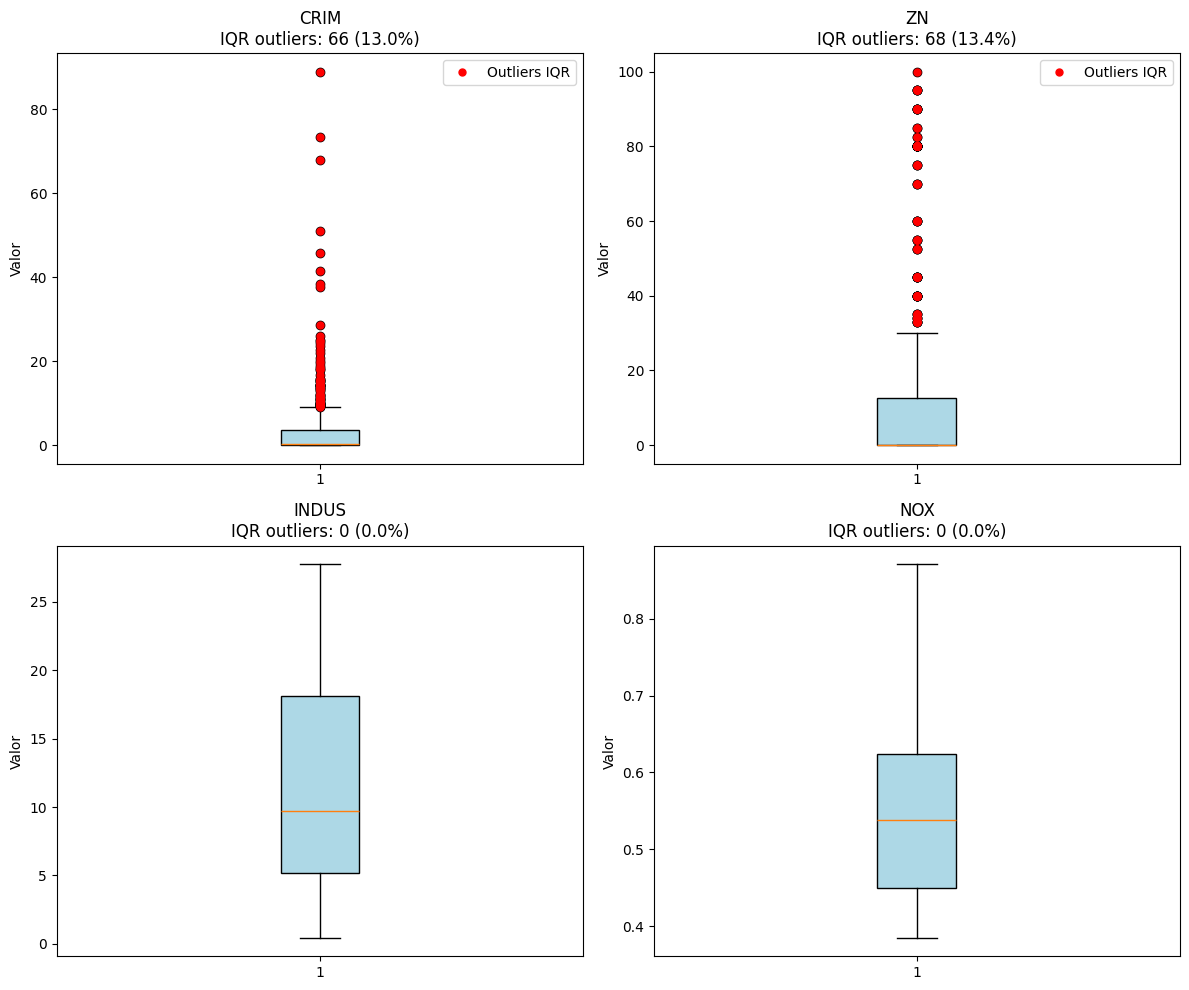


 RESUMEN DE OUTLIERS POR COLUMNA:
----------------------------------------------------------------------


,Total,Outliers IQR,% Outliers IQR,Outliers Z-Score,% Outliers Z-Score
CRIM,506.0,66.0,13.043478,8.0,1.581028
ZN,506.0,68.0,13.438735,14.0,2.766798
INDUS,506.0,0.0,0.000000,0.0,0.000000
NOX,506.0,0.0,0.000000,0.0,0.000000



------------------------------------------------------------
DEMOSTRACIÓN: MÉTODOS PARA MANEJAR OUTLIERS
------------------------------------------------------------

 Columna demostración: CRIM
   • Forma original: (506,)
   • Estadísticas iniciales:
      - Media: 3.61
      - Desviación estándar: 8.60
      - Outliers detectados (IQR): 66

 COMPARACIÓN DE MÉTODOS DE MANEJO DE OUTLIERS:
------------------------------------------------------------


,Mean,Std,Shape
Original,3.613524,8.601545,506.0
Sin Outliers,1.198341,2.128147,440.0
Winsorized,2.800115,4.673368,506.0
Escalado Robusto,0.933791,2.390251,506.0
Log Transform,0.813418,1.022731,506.0


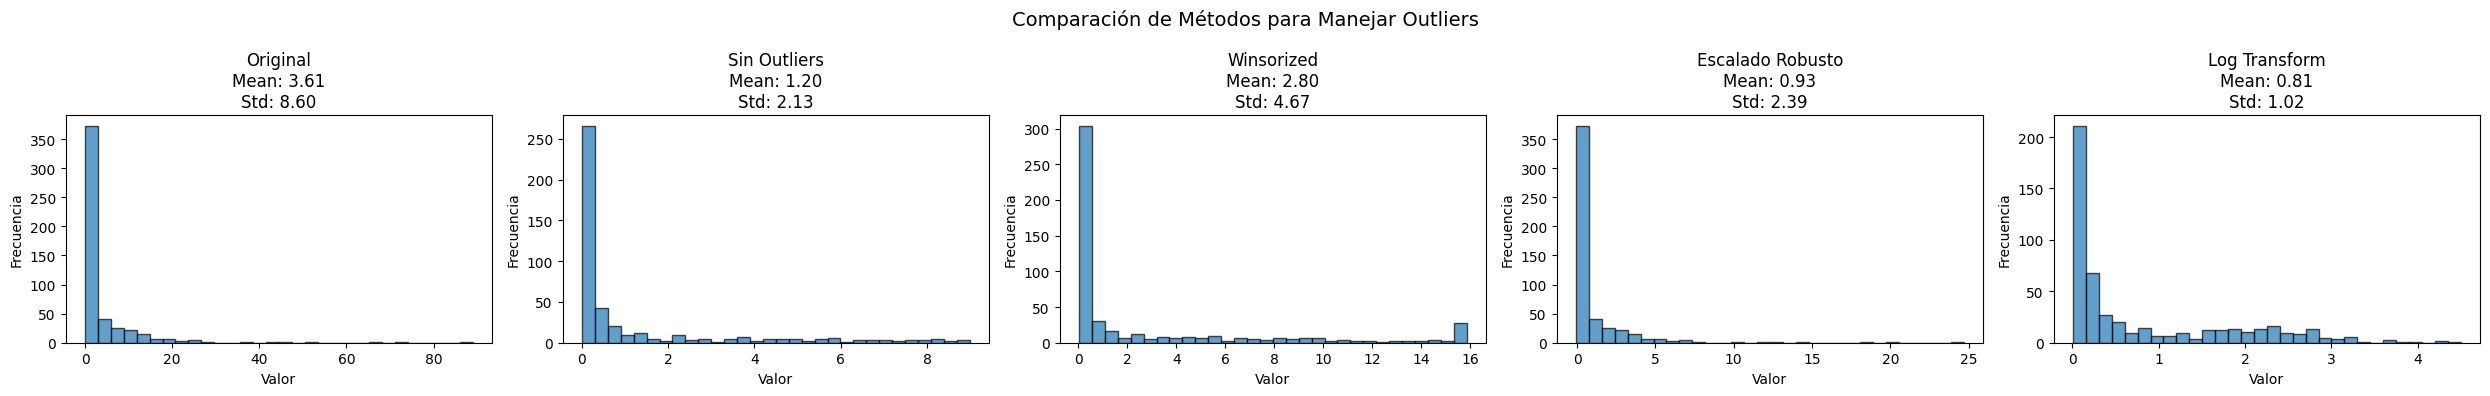

In [15]:
print("\n" + "=" * 70)
print("DETECCIÓN Y MANEJO DE OUTLIERS (VALORES ATÍPICOS)")
print("=" * 70)

print("""
QUÉ SON LOS OUTLIERS:
   • Valores extremadamente altos o bajos
   • Pueden ser errores de medición o casos reales pero raros
   • Afectan significativamente a los modelos de ML

MÉTODOS DE DETECCIÓN:
   1. Método IQR (Rango Intercuartílico)
   2. Método Z-Score (Desviaciones estándar)
   3. Visualización con boxplots
""")

# Seleccionar columnas numéricas para análisis de outliers
analysis_cols = list(numeric_cols[:4])  # Analizar solo 4 columnas para visualización

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

outliers_summary = {}

for idx, col in enumerate(analysis_cols):
    if idx < len(axes):  # Asegurar que no excedamos el número de subplots
        data = df[col].dropna()

        # Método 1: IQR
        Q1 = data.quantile(0.25)
        Q3 = data.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_iqr = data[(data < lower_bound) | (data > upper_bound)]

        # Método 2: Z-Score
        z_scores = np.abs(stats.zscore(data))
        outliers_z = data[z_scores > 3]

        # Boxplot
        bp = axes[idx].boxplot(data, vert=True, patch_artist=True,
                               boxprops=dict(facecolor='lightblue'))

        # Marcar outliers
        if len(outliers_iqr) > 0:
            outlier_positions = np.where(data.isin(outliers_iqr))[0] + 1
            axes[idx].plot(np.ones(len(outliers_iqr)), outliers_iqr.values,
                          'ro', markersize=5, label='Outliers IQR')

        axes[idx].set_title(f'{col}\nIQR outliers: {len(outliers_iqr)} ({len(outliers_iqr)/len(data)*100:.1f}%)')
        axes[idx].set_ylabel('Valor')
        if len(outliers_iqr) > 0:
            axes[idx].legend()

        # Resumen
        outliers_summary[col] = {
            'Total': len(data),
            'Outliers IQR': len(outliers_iqr),
            '% Outliers IQR': (len(outliers_iqr)/len(data))*100,
            'Outliers Z-Score': len(outliers_z),
            '% Outliers Z-Score': (len(outliers_z)/len(data))*100,
            'Min': data.min(),
            'Max': data.max(),
            'Mean': data.mean(),
            'Std': data.std()
        }

# Ocultar ejes extra si hay menos de 4 columnas
for idx in range(len(analysis_cols), len(axes)):
    axes[idx].axis('off')

plt.tight_layout()
plt.show()

# Mostrar resumen de outliers
print("\n RESUMEN DE OUTLIERS POR COLUMNA:")
print("-" * 70)
summary_df = pd.DataFrame(outliers_summary).T
display(summary_df[['Total', 'Outliers IQR', '% Outliers IQR', 'Outliers Z-Score', '% Outliers Z-Score']])

# DEMOSTRACIÓN DE MÉTODOS PARA MANEJAR OUTLIERS
print("\n" + "-" * 60)
print("DEMOSTRACIÓN: MÉTODOS PARA MANEJAR OUTLIERS")
print("-" * 60)

demo_outlier_col = analysis_cols[0]
demo_data = df[demo_outlier_col].copy()

print(f"\n Columna demostración: {demo_outlier_col}")
print(f"   • Forma original: {demo_data.shape}")
print(f"   • Estadísticas iniciales:")
print(f"      - Media: {demo_data.mean():.2f}")
print(f"      - Desviación estándar: {demo_data.std():.2f}")
print(f"      - Outliers detectados (IQR): {outliers_summary[demo_outlier_col]['Outliers IQR']}")

# Método 1: Eliminación de outliers
Q1 = demo_data.quantile(0.25)
Q3 = demo_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_no_outliers = demo_data[(demo_data >= lower_bound) & (demo_data <= upper_bound)]

# Método 2: Winsorization (reemplazar con percentiles)
from scipy.stats.mstats import winsorize
data_winsorized = winsorize(demo_data, limits=[0.05, 0.05])

# Método 3: Transformación logarítmica (para datos positivos con skew)
if demo_data.min() > 0:
    data_log = np.log1p(demo_data)
else:
    data_log = None

# Método 4: Escalado robusto (menos sensible a outliers)
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
data_scaled = scaler.fit_transform(demo_data.values.reshape(-1, 1)).flatten()

# Comparar métodos
methods_comparison = {
    'Original': {
        'Mean': demo_data.mean(),
        'Std': demo_data.std(),
        'Shape': demo_data.shape[0]
    },
    'Sin Outliers': {
        'Mean': data_no_outliers.mean(),
        'Std': data_no_outliers.std(),
        'Shape': data_no_outliers.shape[0]
    },
    'Winsorized': {
        'Mean': data_winsorized.mean(),
        'Std': data_winsorized.std(),
        'Shape': data_winsorized.shape[0]
    },
    'Escalado Robusto': {
        'Mean': data_scaled.mean(),
        'Std': data_scaled.std(),
        'Shape': data_scaled.shape[0]
    }
}

if data_log is not None:
    methods_comparison['Log Transform'] = {
        'Mean': data_log.mean(),
        'Std': data_log.std(),
        'Shape': data_log.shape[0]
    }

print("\n COMPARACIÓN DE MÉTODOS DE MANEJO DE OUTLIERS:")
print("-" * 60)
comp_df = pd.DataFrame(methods_comparison).T
display(comp_df)

# Visualización comparativa
num_methods = len(methods_comparison)
fig, axes = plt.subplots(1, num_methods, figsize=(5*num_methods, 4))

for idx, (method_name, data_dict) in enumerate(methods_comparison.items()):
    if method_name == 'Original':
        data_to_plot = demo_data
    elif method_name == 'Sin Outliers':
        data_to_plot = data_no_outliers
    elif method_name == 'Winsorized':
        data_to_plot = data_winsorized
    elif method_name == 'Escalado Robusto':
        data_to_plot = data_scaled
    elif method_name == 'Log Transform' and data_log is not None:
        data_to_plot = data_log
    else:
        continue

    axes[idx].hist(data_to_plot, bins=30, edgecolor='black', alpha=0.7)
    axes[idx].set_title(f'{method_name}\nMean: {data_dict["Mean"]:.2f}\nStd: {data_dict["Std"]:.2f}')
    axes[idx].set_xlabel('Valor')
    axes[idx].set_ylabel('Frecuencia')

plt.suptitle('Comparación de Métodos para Manejar Outliers', fontsize=14)
plt.tight_layout()
plt.show()
